# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 提出问题

**问题**：
1. 哪一个国王发起了最多的战争?哪一个国王作为攻击方的胜利比率最大?
2. 哪个区域发生战争次数最多?哪一个区域作为攻击方的胜利比率最大?
3. 哪一类战争发生次数最多?哪一类战争攻击方的胜利比率最大?
4. 夏季和其他季节中,作为攻击方的胜利比率有变化吗?
5. 攻击方和防守方力量比和攻击方的战争结果有什么联系?
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：将此文本替换为你的回答！


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

## 数据评估和清理

In [1]:
# TO DO: load pacakges
import pandas as pd
% matplotlib inline

In [2]:
# TO DO: load the dataset
df_base=pd.read_csv('battles.csv')
df_base.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [3]:
df_base.tail()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,...,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,...,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,...,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,...,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [4]:
# TO DO: check the dataset general info
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [5]:
#检查是否有冗余记录
sum(df_base.duplicated())

0

针对5个问题涉及的列进行分析,看看是否需要清洗:

1. 哪一个国王发起了最多的战争?哪一个国王作为攻击方的胜利比率最大?

问题涉及的列存在空值: attacker_king(2个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.attacker_king对于"Joffrey/Tommen Baratheon"Tomen Baratheon继承了Joffrey的王位，这种情况,战争发起者是第一位国王,所以分析前需要截取该字段第一位国王姓名.

2. 哪个区域发生战争次数最多?哪一个区域作为攻击方的胜利比率最大?

问题涉及的列存在空值:region,attacker_outcome(1个空值),分析前需要剔除空值记录.

3. 哪一类战争发生次数最多?哪一类战争攻击方的胜利比率最大?

问题涉及的列存在空值:battle_type(1个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.

4. 夏季和其他季节中,作为攻击方的胜利比率有变化吗?

问题涉及的列存在空值:summer(1个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.

5. 攻击方和防守方力量比和攻击方的战争结果有什么联系?

问题涉及的列存在空值:attacker_size(14个空值),defender_size(19个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.

In [6]:
df_base['attacker_king'].isnull().value_counts()

False    36
True      2
Name: attacker_king, dtype: int64

In [7]:
df_base['attacker_outcome'].isnull().value_counts()

False    37
True      1
Name: attacker_outcome, dtype: int64

In [8]:
df_base['region'].isnull().value_counts()

False    38
Name: region, dtype: int64

In [9]:
df_base['battle_type'].isnull().value_counts()

False    37
True      1
Name: battle_type, dtype: int64

In [10]:
df_base['summer'].isnull().value_counts()

False    37
True      1
Name: summer, dtype: int64

In [11]:
df_base['attacker_size'].isnull().value_counts()

False    24
True     14
Name: attacker_size, dtype: int64

In [12]:
df_base['defender_size'].isnull().value_counts()

True     19
False    19
Name: defender_size, dtype: int64

In [13]:
# TO DO: clean the data (optional: only there are problems)
#提取删除指定列为空的函数drop_na
def drop_na(df,colname,keywords):
    df[colname]=df[colname].fillna(keywords)
    df=df.drop(df[df[colname]==keywords].index.tolist())
    return df

In [14]:
#删除战争结果未知的1条记录,作为基础数据
df_new=drop_na(df_base,'attacker_outcome','tobedrop')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 25 columns):
name                  37 non-null object
year                  37 non-null int64
battle_number         37 non-null int64
attacker_king         35 non-null object
defender_king         34 non-null object
attacker_1            37 non-null object
attacker_2            9 non-null object
attacker_3            2 non-null object
attacker_4            1 non-null object
defender_1            36 non-null object
defender_2            1 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         23 non-null float64
defender_size         18 non-null float64
attacker_commander    36 non-null object
defender_commander    27 non-null object
summer                36 non-null floa

In [15]:
#attacker_king,summer存在null值,替换为'tobedrop'.attacker_size和defender_size列null值暂不替换.
df_new['attacker_king']=df_new['attacker_king'].fillna('tobedrop')
df_new['summer']=df_new['summer'].fillna(-1)
#df_new['attacker_size']=df_new['attacker_size'].fillna(-1)
#df_new['defender_size']=df_new['defender_size'].fillna(-1)

In [16]:
#对于"Joffrey/Tommen Baratheon"Tomen Baratheon继承了Joffrey的王位，这种情况,战争发起者是第一位国王,所以分析前需要截取该字段第一位国王姓名.在此检测拆分前后是否产生空值.
df_new['attacker_king'].isnull().value_counts()

False    37
Name: attacker_king, dtype: int64

In [17]:
i=0
while i<len(df_new.index):
    if '/' in df_new.loc[i,'attacker_king']:
        df_new.loc[i,'attacker_king']=df_new.loc[i,'attacker_king'].split('/')[0]
        df_new.loc[i,'king_replace']='Y'
        i+=1
    else:
        df_new.loc[i,'king_replace']='N'
        i+=1
        
#拆分后,'attacker_king'列未产生新的空值.
df_new['attacker_king'].isnull().value_counts()

False    37
Name: attacker_king, dtype: int64

In [18]:
#增加一列攻守力量比,将null值替换为-1,-1说明攻守力量至少有一方记录不全,分析时待丢弃
df_new['power_ratio']=df_new['attacker_size']/df_new['defender_size']
df_new['power_ratio']=df_new['power_ratio'].fillna(-1)

使用pd.set_option('display.max_columns', None)使表格中列显示时不被省略

In [19]:
pd.set_option('display.max_columns', None)
df_new.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,king_replace,power_ratio
0,Battle of the Golden Tooth,298,1,Joffrey,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,Y,3.7500
1,Battle at the Mummer's Ford,298,2,Joffrey,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,Y,-1.0000
2,Battle of Riverrun,298,3,Joffrey,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,Y,1.5000
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,N,0.9000
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,N,0.3125


## 数据探索分析

哪一个国王发起了最多的战争?哪一个国王作为攻击方的胜利比率最大?

问题涉及的列存在空值: attacker_king(2个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.attacker_king对于"Joffrey/Tommen Baratheon"Tomen Baratheon继承了Joffrey的王位，这种情况,战争发起者是第一位国王,所以分析前需要截取该字段第一位国王姓名.

哪个区域发生战争次数最多?哪一个区域作为攻击方的胜利比率最大?
问题涉及的列存在空值:region,attacker_outcome(1个空值),分析前需要剔除空值记录.

哪一类战争发生次数最多?哪一类战争攻击方的胜利比率最大?
问题涉及的列存在空值:battle_type(1个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.

夏季和其他季节中,作为攻击方的胜利比率有变化吗?
问题涉及的列存在空值:summer(1个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.

攻击方和防守方力量比和攻击方的战争结果有什么联系?
问题涉及的列存在空值:attacker_size(14个空值),defender_size(19个空值),attacker_outcome(1个空值),分析前需要剔除空值记录.

In [20]:
# 1哪一个国王发起了最多的战争?哪一个国王作为攻击方的胜利比率最大?
#问题涉及的列存在空值: attacker_king(2个空值,基础表已标记为tobedrop),attacker_outcome(1个空值,基础表已删除),attacker_king对于"Joffrey/Tommen Baratheon"Tomen Baratheon继承了Joffrey的王位，这种情况,战争发起者是第一位国王,所以分析前需要截取该字段第一位国王姓名.
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe
df_king=df_new[['attacker_king','attacker_outcome','king_replace']].groupby(['attacker_king','attacker_outcome']).count().reset_index()
df_king.columns=['attacker_king','attacker_outcome','times']
df_king.head()

,attacker_king,attacker_outcome,times
0,Balon,win,7
1,Joffrey,loss,1
2,Joffrey,win,13
3,Robb Stark,loss,2
4,Robb Stark,win,8


In [21]:
#抽取二次分析操作作为公共函数
def df_analyse(df,column1,fillna_number):
    df_analyse=pd.DataFrame([],index=df[column1].unique().tolist(),columns=['win_times','loss_times','draw_times','total_times','win_rate'])
    df_analyse=df_analyse.fillna(fillna_number)
    for i in df_analyse.index:
        if df['times'][df[column1].isin([i])&df['attacker_outcome'].isin(['win'])].any():
           #https://stackoverflow.com/questions/18199288/getting-the-integer-index-of-a-pandas-dataframe-row-fulfilling-a-condition
            s=df.index.get_loc(df.index[df[column1].isin([i])&df['attacker_outcome'].isin(['win'])][0])
            df_analyse.loc[i]['win_times']=df.iat[s,2]
        if df['times'][df[column1].isin([i])&df['attacker_outcome'].isin(['loss'])].any():
            s=df.index.get_loc(df.index[df[column1].isin([i])&df['attacker_outcome'].isin(['loss'])][0])
            df_analyse.loc[i]['loss_times']=df.iat[s,2]
        if df['times'][df[column1].isin([i])&df['attacker_outcome'].isin(['draw'])].any():
            s=df.index.get_loc(df.index[df[column1].isin([i])&df['attacker_outcome'].isin(['draw'])][0])
            df_analyse.loc[i]['draw_times']=df.iat[s,2]
        df_analyse.loc[i]['total_times']=df_analyse.loc[i]['win_times']+df_analyse.loc[i]['loss_times']+df_analyse.loc[i]['draw_times']
        df_analyse.loc[i]['win_rate']=float(df_analyse.loc[i]['win_times']/df_analyse.loc[i]['total_times'])

    #https://blog.csdn.net/songyunli1111/article/details/79306639 
    #删掉tobedrop行
    if 'tobedrop' in df_analyse.index:
        df_analyse.drop(['tobedrop'],inplace=True)
    return df_analyse

待验证:在生成一下这个数据框的时候，你可以看下这段代码会不会个更加简便一些
df = pd.read_csv('battles.csv')
df = df[df.attacker_outcome.notnull()]
df_r = df.groupby(['attacker_king','attacker_outcome']).name.count().unstack()
df_r.columns.name = None
df_r.fillna(0,inplace = True)
df_r["ratio"] = df_r["win"]/(df_r["win"]+df_r["loss"])
df_r["Total"] = df_r["win"]+df_r["loss"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E64CAC8>,
      dtype=object)

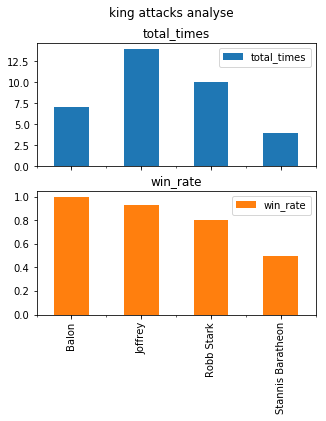

In [22]:
df_king_rate=df_analyse(df_king,'attacker_king',0.0)
df_king_rate[['total_times','win_rate']].plot(kind='bar',subplots=True,title='king attacks analyse',figsize=(5,5))

总次数和胜率可以绘制在一起，使用组合的图形
import matplotlib.pyplot as plt
ax1 = df_king_rate["total_times"].plot(kind = 'bar')
ax2 = ax1.twinx()
ax2.set_ylim(0,1.1)
ax2.plot(df_king_rate.index,df_king_rate["win_rate"],'ro-')# ro- 是一种格式简写，r-read,o-标点，- -折线 
ax1.legend(bbox_to_anchor=(1.39, 1.03))
plt.legend(bbox_to_anchor=(1.352, 0.9))
plt.show()
将胜负情况也绘制出来就更直观了
import matplotlib.pyplot as plt
ax1 = df_king_rate["win_times","loss_times"].plot(kind = 'bar')
ax2 = ax1.twinx()
ax2.set_ylim(0,1.1)
ax2.plot(df_king_rate.index,df_king_rate["win_rate"],'ro-')# ro- 是一种格式简写，r-read,o-标点，- -折线 
ax1.legend(bbox_to_anchor=(1.39, 1.03))
plt.legend(bbox_to_anchor=(1.352, 0.9))
plt.show()

从上图得出:Joffrey主动发起战争次数最多,Balon Greyjoy胜利比率最高.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010795438>,
      dtype=object)

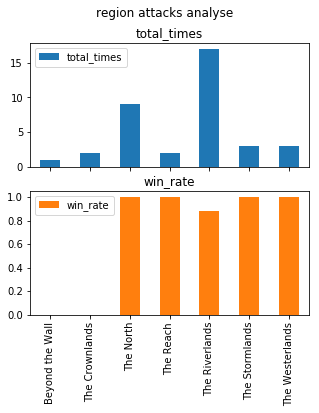

In [23]:
#2哪个区域发生战争次数最多?哪一个区域作为攻击方的胜利比率最大? 问题涉及的列存在空值:region,attacker_outcome(1个空值,基础表已删除).
df_region=df_new[['region','attacker_outcome','king_replace']].groupby(['region','attacker_outcome']).count().reset_index()
df_region.columns=['region','attacker_outcome','times']
df_region_rate=df_analyse(df_region,'region',0.0)
df_region_rate[['total_times','win_rate']].plot(kind='bar',subplots=True,title='region attacks analyse',figsize=(5,5))

从上图得出,The Riverlands发生的战争次数最多,The North,The Reach,The Stormlands,The Westerlands胜利比率最高.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000108A3438>,
      dtype=object)

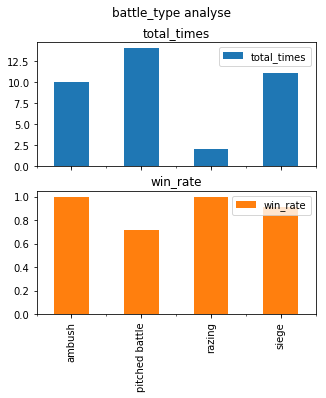

In [24]:
#3哪一类战争发生次数最多?哪一类战争攻击方的胜利比率最大? 问题涉及的列存在空值:battle_type(1个空值,已替换为tobedtop),attacker_outcome(1个空值,基础数据已删除).
df_battle=df_new[['battle_type','attacker_outcome','king_replace']].groupby(['battle_type','attacker_outcome']).count().reset_index()
df_battle.columns=['battle_type','attacker_outcome','times']
df_battle_rate=df_analyse(df_battle,'battle_type',0.0)
df_battle_rate[['total_times','win_rate']].plot(kind='bar',subplots=True,title='battle_type analyse',figsize=(5,5))

从上图看出,pitched battle类型战争最多,胜率最低.ambush和razing类型战争胜率最高.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000109A1E80>,
      dtype=object)

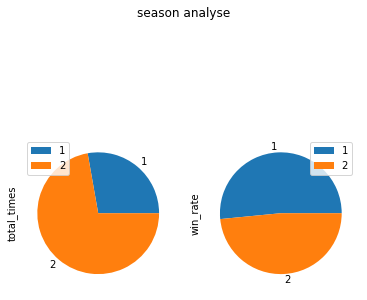

In [25]:
#4夏季和其他季节中,作为攻击方的胜利比率有变化吗? 问题涉及的列存在空值:summer(1个空值,已替换为-1),attacker_outcome(1个空值,已删除).
df_season=df_new[['summer','attacker_outcome','king_replace']].groupby(['summer','attacker_outcome']).count().reset_index()
df_season.columns=['summer_or_not','attacker_outcome','times']
df_season_rate=df_analyse(df_season,'summer_or_not',0.0).reset_index()
df_season_rate=drop_na(df_season_rate,'index',-1.0)
df_season_rate[['total_times','win_rate']].plot(kind='pie',subplots=True,title='season analyse',figsize=(6,6))

从上图看出,summer发生的战争次数最多,胜率比其他季节低.

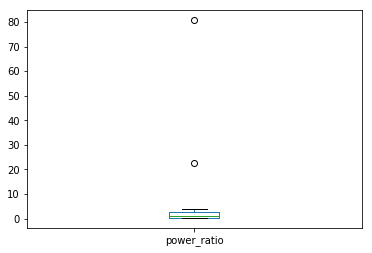

In [26]:
#5攻击方和防守方力量比和攻击方的战争结果有什么联系? 
df_power=df_new[['power_ratio','attacker_outcome','king_replace']].groupby(['power_ratio','attacker_outcome']).count().reset_index()
df_power=drop_na(df_power,'power_ratio',-1.0)
df_power['power_ratio'].plot(kind='box')

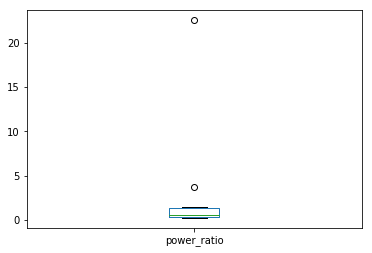

In [27]:
df_win=df_power[df_power['attacker_outcome']=='win']
#df_win=drop_na(df_win,'power_ratio',-1.0)
df_win['power_ratio'].plot(kind='box')

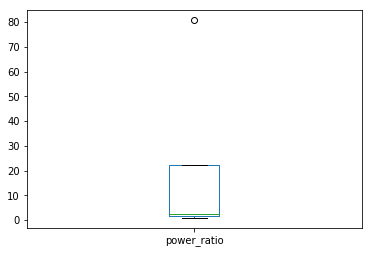

In [28]:
df_loss=df_power[df_power['attacker_outcome']=='loss']
#df_loss=drop_na(df_loss,'power_ratio',-1.0)
df_loss['power_ratio'].plot(kind='box')

从上图看出,结果为win的战争发起方力量优势并不比失败的战争配置高.

胜负情况下的power ratio可以绘制在一起，更有对比性：
import seaborn as sns
sns.boxplot(x="attacker_outcome",y="power_ratio",data=df_power,palette="Set3")
如果你不想显示异常值点，可以加上参数showfliers=False

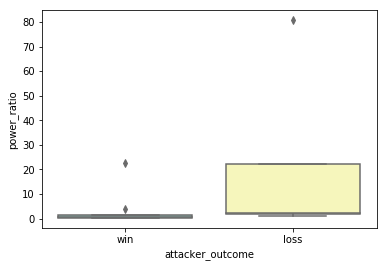

In [30]:
import seaborn as sns
sns.boxplot(x="attacker_outcome",y="power_ratio",data=df_power,palette="Set3")

## 得出结论

  根据5个维度分析:Joffrey主动发起战争次数最多,Balon Greyjoy胜利比率最高.The Riverlands发生的战争次数最多,The North,The Reach,The Stormlands,The Westerlands胜利比率最高.pitched battle类型战争最多,胜率最低.ambush和razing类型战争胜率最高.summer发生的战争次数最多,胜率比其他季节低.结果为win的战争发起方力量优势并不比失败的战争配置高.
  初步可以得出对于五王之战,对战争结果影响最大的两个因素:统帅和战争类型.另外两个维度季节和地点对于结果有一定影响.军队力量比对战争结果没有明显影响.

## 反思

1. 五王之战少了蓝礼的数据,是这家伙没有发起战争吗?
2. 有两项结果未知的战争记录被删除,存在一定的误差.


在图表颜色选择上建议选择饱和度较低的颜色，这样可以使得图表看起来更柔和
颜色选择可以看这：https://blog.csdn.net/wwkaven/article/details/32138987
pandas的学习资料看这里：https://www.jianshu.com/p/04d180d90a3f
你还可以在这里选择你喜好的图表风格https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html